<a href="https://colab.research.google.com/github/poojamahajan0712/EVA/blob/master/S12_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Assignment A:
Download this TINY IMAGENET (Links to an external site.) dataset. 
Train ResNet18 on this dataset (70/30 split) for 50 Epochs. Target 50%+ Validation Accuracy.''' 

from google.colab import drive

drive.mount( '/content/drive', force_remount=True )
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Cloning into 'IMagenet'...
remote: Enumerating objects: 120594, done.
remote: Total 120594 (delta 0), reused 0 (delta 0), pack-reused 120594
Receiving objects: 100% (120594/120594), 212.68 MiB | 25.07 MiB/s, done.
Resolving deltas: 100% (1115/1115), done.
Checking out files: 100% (120206/120206), done.
test  train  val  wnids.txt  words.txt


In [0]:

%matplotlib inline
#!pip install albumentations==0.4.5
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image
import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models


import resnet1
#import model7
from util1 import *
from train_version1 import train
from new_test2 import test
from data_load import dataload
from album1 import album_train,album_test
from movements import sorting



In [0]:
#sorting()

data_transforms = {'train_data':album_train(),'test_data':album_test()}
data_dir = 'IMagenet/tiny-imagenet-200/'
dataloaders=dataload(data_transforms,data_dir)

In [0]:
'''net = model7.Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
summary(net, input_size=(3, 64, 64))
print(device)'''

In [3]:
net = resnet1.ResNet18(num_classes=200)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
summary(net, input_size=(3, 64, 64))
print(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [4]:
#trying StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.55, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)

#scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(trainloader), epochs=24, pct_start=0.2)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, verbose=True)
def run():
  train_accs,test_losses,test_accs,pred_wrong_t,true_wrong_t,image_t=([] for i in range(6))
  lr=[]
  n=50
  for epoch in range(n):
      print("EPOCH:", epoch+1)
      train(net, device, dataloaders['train_data'], criterion, optimizer, epoch,train_accs)
      test((epoch==(n-1)),net, device, dataloaders['test_data'], criterion,test_losses, test_accs,pred_wrong_t,true_wrong_t,image_t)
      
      #lr.append(optimizer['lr'])
      
      print(scheduler.get_lr())
      lr.append(scheduler.get_lr())
      scheduler.step(epoch)

  return(train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t,lr)
 

train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t,lr=run()

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 2038/33000 (6.18%)

[0.55]
EPOCH: 2


Loss=3.7414462566375732 Batch_id=150 Accuracy=12.95: 100%|██████████| 151/151 [01:08<00:00,  2.20it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0077, Accuracy: 4982/33000 (15.10%)

[0.55]
EPOCH: 3


Loss=3.4939498901367188 Batch_id=150 Accuracy=20.71: 100%|██████████| 151/151 [01:07<00:00,  2.24it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 7189/33000 (21.78%)

[0.55]
EPOCH: 4


Loss=3.3659708499908447 Batch_id=150 Accuracy=26.18: 100%|██████████| 151/151 [01:06<00:00,  2.26it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7442/33000 (22.55%)

[0.55]
EPOCH: 5


Loss=2.9239625930786133 Batch_id=150 Accuracy=30.63: 100%|██████████| 151/151 [01:06<00:00,  2.27it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8532/33000 (25.85%)

[0.55]
EPOCH: 6


Loss=2.6156983375549316 Batch_id=150 Accuracy=35.06: 100%|██████████| 151/151 [01:05<00:00,  2.29it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 7656/33000 (23.20%)

[0.55]
EPOCH: 7


Loss=2.5370171070098877 Batch_id=150 Accuracy=41.79: 100%|██████████| 151/151 [01:05<00:00,  2.29it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8527/33000 (25.84%)

[0.26949999999999996]
EPOCH: 8


Loss=2.294179916381836 Batch_id=150 Accuracy=46.13: 100%|██████████| 151/151 [01:06<00:00,  2.27it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 10301/33000 (31.22%)

[0.385]
EPOCH: 9


Loss=1.8702718019485474 Batch_id=150 Accuracy=50.83: 100%|██████████| 151/151 [01:06<00:00,  2.27it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 10062/33000 (30.49%)

[0.385]
EPOCH: 10


Loss=1.6228729486465454 Batch_id=150 Accuracy=55.56: 100%|██████████| 151/151 [01:05<00:00,  2.31it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 10024/33000 (30.38%)

[0.385]
EPOCH: 11


Loss=1.9521851539611816 Batch_id=150 Accuracy=61.26: 100%|██████████| 151/151 [01:06<00:00,  2.28it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 10270/33000 (31.12%)

[0.385]
EPOCH: 12


Loss=1.083155632019043 Batch_id=150 Accuracy=72.91: 100%|██████████| 151/151 [01:07<00:00,  2.25it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 10570/33000 (32.03%)

[0.18864999999999996]
EPOCH: 13


Loss=0.9036276340484619 Batch_id=150 Accuracy=79.02: 100%|██████████| 151/151 [01:08<00:00,  2.19it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 10333/33000 (31.31%)

[0.26949999999999996]
EPOCH: 14


Loss=0.8080920577049255 Batch_id=150 Accuracy=82.71: 100%|██████████| 151/151 [01:08<00:00,  2.21it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 10533/33000 (31.92%)

[0.26949999999999996]
EPOCH: 15


Loss=0.78038489818573 Batch_id=150 Accuracy=85.78: 100%|██████████| 151/151 [01:07<00:00,  2.25it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 10164/33000 (30.80%)

[0.26949999999999996]
EPOCH: 16


Loss=0.5531884431838989 Batch_id=150 Accuracy=88.44: 100%|██████████| 151/151 [01:06<00:00,  2.28it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0084, Accuracy: 10200/33000 (30.91%)

[0.26949999999999996]
EPOCH: 17


Loss=0.31243064999580383 Batch_id=150 Accuracy=93.51: 100%|██████████| 151/151 [01:06<00:00,  2.28it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0084, Accuracy: 11054/33000 (33.50%)

[0.13205499999999995]
EPOCH: 18


Loss=0.18808278441429138 Batch_id=150 Accuracy=95.99: 100%|██████████| 151/151 [01:06<00:00,  2.28it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 11114/33000 (33.68%)

[0.18864999999999996]
EPOCH: 19


Loss=0.13856761157512665 Batch_id=150 Accuracy=96.99: 100%|██████████| 151/151 [01:06<00:00,  2.29it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0090, Accuracy: 10982/33000 (33.28%)

[0.18864999999999996]
EPOCH: 20


Loss=0.12063701450824738 Batch_id=150 Accuracy=97.55: 100%|██████████| 151/151 [01:06<00:00,  2.27it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0090, Accuracy: 10906/33000 (33.05%)

[0.18864999999999996]
EPOCH: 21


Loss=0.10379274189472198 Batch_id=150 Accuracy=98.02: 100%|██████████| 151/151 [01:06<00:00,  2.26it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 11110/33000 (33.67%)

[0.18864999999999996]
EPOCH: 22


Loss=0.0783311054110527 Batch_id=150 Accuracy=98.69: 100%|██████████| 151/151 [01:07<00:00,  2.24it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 11331/33000 (34.34%)

[0.09243849999999998]
EPOCH: 23


Loss=0.017200518399477005 Batch_id=150 Accuracy=99.03: 100%|██████████| 151/151 [01:06<00:00,  2.25it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 11389/33000 (34.51%)

[0.13205499999999998]
EPOCH: 24


Loss=0.02941167913377285 Batch_id=150 Accuracy=99.29: 100%|██████████| 151/151 [01:06<00:00,  2.28it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 11464/33000 (34.74%)

[0.13205499999999998]
EPOCH: 25


Loss=0.016377925872802734 Batch_id=150 Accuracy=99.50: 100%|██████████| 151/151 [01:06<00:00,  2.28it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0094, Accuracy: 11417/33000 (34.60%)

[0.13205499999999998]
EPOCH: 26


Loss=0.007655429653823376 Batch_id=150 Accuracy=99.54: 100%|██████████| 151/151 [01:06<00:00,  2.27it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 11425/33000 (34.62%)

[0.13205499999999998]
EPOCH: 27


Loss=0.04285874217748642 Batch_id=150 Accuracy=99.64: 100%|██████████| 151/151 [01:06<00:00,  2.29it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 11543/33000 (34.98%)

[0.06470694999999999]
EPOCH: 28


Loss=0.028739280998706818 Batch_id=150 Accuracy=99.71: 100%|██████████| 151/151 [01:06<00:00,  2.26it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 11543/33000 (34.98%)

[0.09243849999999998]
EPOCH: 29


Loss=0.04008211940526962 Batch_id=150 Accuracy=99.76: 100%|██████████| 151/151 [01:06<00:00,  2.27it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0096, Accuracy: 11501/33000 (34.85%)

[0.09243849999999998]
EPOCH: 30


Loss=0.015809955075383186 Batch_id=150 Accuracy=99.82: 100%|██████████| 151/151 [01:07<00:00,  2.23it/s]


Test set: Average loss: 0.0096, Accuracy: 11534/33000 (34.95%)

[0.09243849999999998]
EPOCH: 31


KeyboardInterrupt: ignored

In [0]:
import torch.nn as nn
from torch.optim import SGD,Adam
from torch_lr_finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer=SGD(net.parameters(), lr=0.001)
lr_finder=LRFinder(net,optimizer,criterion,device="cuda")
lr_finder.range_test(dataloaders['train_data'],end_lr=1,num_iter=500,step_mode="exp")


Learning rate search finished. See the graph with {finder_name}.plot()


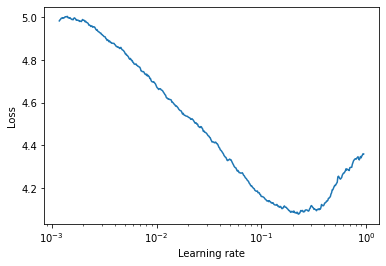

In [0]:
lr_finder.plot()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.55, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True,factor=0.7)
def run():
  train_accs,test_losses,test_accs,pred_wrong_t,true_wrong_t,image_t=([] for i in range(6))
  n=50
  for epoch in range(n):
      print("EPOCH:", epoch+1)
      
      train(net, device, dataloaders['train_data'], criterion, optimizer, epoch,train_accs)
      test((epoch==(n-1)),net, device, dataloaders['test_data'], criterion, test_losses, test_accs,pred_wrong_t,true_wrong_t,image_t)
      scheduler.step(epoch)
  return(train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t)
 

train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t=run()

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


Loss=4.482414245605469 Batch_id=150 Accuracy=3.67: 100%|██████████| 151/151 [01:11<00:00,  2.11it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 2003/33000 (6.07%)

EPOCH: 2


Loss=4.030448913574219 Batch_id=150 Accuracy=10.89: 100%|██████████| 151/151 [01:08<00:00,  2.19it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 4822/33000 (14.61%)

EPOCH: 3


Loss=3.7043657302856445 Batch_id=150 Accuracy=17.01: 100%|██████████| 151/151 [01:08<00:00,  2.19it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 5591/33000 (16.94%)

EPOCH: 4


Loss=3.341745376586914 Batch_id=150 Accuracy=21.57: 100%|██████████| 151/151 [01:08<00:00,  2.21it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 7316/33000 (22.17%)

EPOCH: 5


Loss=3.4175610542297363 Batch_id=150 Accuracy=25.24: 100%|██████████| 151/151 [01:09<00:00,  2.18it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7885/33000 (23.89%)

EPOCH: 6


Loss=3.19331693649292 Batch_id=150 Accuracy=28.34: 100%|██████████| 151/151 [01:08<00:00,  2.19it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8675/33000 (26.29%)

EPOCH: 7


Loss=2.9438791275024414 Batch_id=150 Accuracy=31.32: 100%|██████████| 151/151 [01:06<00:00,  2.26it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 9138/33000 (27.69%)

Epoch     7: reducing learning rate of group 0 to 3.8500e-01.
EPOCH: 8


Loss=2.752781629562378 Batch_id=150 Accuracy=36.81: 100%|██████████| 151/151 [01:07<00:00,  2.23it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 9974/33000 (30.22%)

EPOCH: 9


Loss=2.623699903488159 Batch_id=150 Accuracy=39.46: 100%|██████████| 151/151 [01:09<00:00,  2.18it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 10366/33000 (31.41%)

EPOCH: 10


Loss=2.5961291790008545 Batch_id=150 Accuracy=41.92: 100%|██████████| 151/151 [01:08<00:00,  2.22it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 10267/33000 (31.11%)

EPOCH: 11


Loss=2.4317798614501953 Batch_id=150 Accuracy=44.61: 100%|██████████| 151/151 [01:07<00:00,  2.24it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 10351/33000 (31.37%)

EPOCH: 12


Loss=2.3127121925354004 Batch_id=150 Accuracy=47.21: 100%|██████████| 151/151 [01:10<00:00,  2.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 10216/33000 (30.96%)

EPOCH: 13


Loss=1.9582934379577637 Batch_id=150 Accuracy=50.40: 100%|██████████| 151/151 [01:08<00:00,  2.22it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 10840/33000 (32.85%)

Epoch    13: reducing learning rate of group 0 to 2.6950e-01.
EPOCH: 14


Loss=1.557613492012024 Batch_id=150 Accuracy=56.91: 100%|██████████| 151/151 [01:08<00:00,  2.20it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 11303/33000 (34.25%)

EPOCH: 15


Loss=1.608238697052002 Batch_id=150 Accuracy=60.33: 100%|██████████| 151/151 [01:09<00:00,  2.18it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 11027/33000 (33.42%)

EPOCH: 16


Loss=1.6669578552246094 Batch_id=150 Accuracy=63.35: 100%|██████████| 151/151 [01:08<00:00,  2.19it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 10940/33000 (33.15%)

EPOCH: 17


Loss=1.4491817951202393 Batch_id=150 Accuracy=66.63: 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 11109/33000 (33.66%)

EPOCH: 18


Loss=1.1955374479293823 Batch_id=150 Accuracy=68.75: 100%|██████████| 151/151 [01:08<00:00,  2.20it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 11005/33000 (33.35%)

EPOCH: 19


Loss=1.2987691164016724 Batch_id=150 Accuracy=71.63: 100%|██████████| 151/151 [01:11<00:00,  2.11it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 10640/33000 (32.24%)

Epoch    19: reducing learning rate of group 0 to 1.8865e-01.
EPOCH: 20


Loss=1.0149821043014526 Batch_id=150 Accuracy=78.54: 100%|██████████| 151/151 [01:09<00:00,  2.18it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 11309/33000 (34.27%)

EPOCH: 21


Loss=0.8885467052459717 Batch_id=150 Accuracy=81.94: 100%|██████████| 151/151 [01:09<00:00,  2.18it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 11215/33000 (33.98%)

EPOCH: 22


Loss=0.731579065322876 Batch_id=150 Accuracy=83.35: 100%|██████████| 151/151 [01:09<00:00,  2.18it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 11122/33000 (33.70%)

EPOCH: 23


Loss=0.7330803871154785 Batch_id=150 Accuracy=84.74: 100%|██████████| 151/151 [01:09<00:00,  2.17it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 10936/33000 (33.14%)

EPOCH: 24


Loss=0.5012565851211548 Batch_id=25 Accuracy=86.91:  17%|█▋        | 26/151 [00:52<00:20,  5.97it/s]

KeyboardInterrupt: ignored

In [6]:
#Onecycle LR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9) #,weight_decay=0.003 for L2 regularisation
#pct_start=5/24
#final_div_factor=100->min_lr= 0.1/100 ->0.001
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(dataloaders['train_data']), epochs=40, pct_start=0.3,final_div_factor=10.0)

def run():
  train_accs,test_losses,test_accs,pred_wrong_t,true_wrong_t,image_t=([] for i in range(6))
  #lr=[]
  n=40
  for epoch in range(n):
      print("EPOCH:", epoch+1)
      train(net, device, dataloaders['train_data'], criterion, optimizer, epoch,train_accs,scheduler)
      test((epoch==(n-1)),net, device, dataloaders['test_data'], criterion, test_losses, test_accs,pred_wrong_t,true_wrong_t,image_t)

  return(train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t)
 

train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t=run()

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


Loss=4.840501308441162 Batch_id=150 Accuracy=5.08: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0094, Accuracy: 1928/33000 (5.84%)

EPOCH: 2


Loss=4.5903825759887695 Batch_id=150 Accuracy=6.99: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0090, Accuracy: 2574/33000 (7.80%)

EPOCH: 3


Loss=4.250519275665283 Batch_id=150 Accuracy=9.22: 100%|██████████| 151/151 [02:51<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 2912/33000 (8.82%)

EPOCH: 4


Loss=3.9360811710357666 Batch_id=150 Accuracy=12.96: 100%|██████████| 151/151 [02:51<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 4401/33000 (13.34%)

EPOCH: 5


Loss=3.829629421234131 Batch_id=150 Accuracy=16.66: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 5204/33000 (15.77%)

EPOCH: 6


Loss=3.262829542160034 Batch_id=150 Accuracy=20.45: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 6200/33000 (18.79%)

EPOCH: 7


Loss=3.3730666637420654 Batch_id=150 Accuracy=23.91: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7480/33000 (22.67%)

EPOCH: 8


Loss=3.09537935256958 Batch_id=150 Accuracy=27.46: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7468/33000 (22.63%)

EPOCH: 9


Loss=2.926089286804199 Batch_id=150 Accuracy=30.34: 100%|██████████| 151/151 [02:50<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8545/33000 (25.89%)

EPOCH: 10


Loss=2.94083309173584 Batch_id=150 Accuracy=33.42: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 9204/33000 (27.89%)

EPOCH: 11


Loss=2.590153694152832 Batch_id=150 Accuracy=36.28: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7666/33000 (23.23%)

EPOCH: 12


Loss=2.585777997970581 Batch_id=150 Accuracy=39.09: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 9740/33000 (29.52%)

EPOCH: 13


Loss=2.2681188583374023 Batch_id=150 Accuracy=41.66: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 10436/33000 (31.62%)

EPOCH: 14


Loss=2.246783971786499 Batch_id=150 Accuracy=43.83: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 11362/33000 (34.43%)

EPOCH: 15


Loss=2.5043044090270996 Batch_id=150 Accuracy=45.96: 100%|██████████| 151/151 [02:51<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 11519/33000 (34.91%)

EPOCH: 16


Loss=2.028330087661743 Batch_id=150 Accuracy=48.33: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 11858/33000 (35.93%)

EPOCH: 17


Loss=1.9200531244277954 Batch_id=150 Accuracy=50.41: 100%|██████████| 151/151 [02:51<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 11794/33000 (35.74%)

EPOCH: 18


Loss=1.8171148300170898 Batch_id=150 Accuracy=52.85: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 11708/33000 (35.48%)

EPOCH: 19


Loss=1.751733422279358 Batch_id=150 Accuracy=54.49: 100%|██████████| 151/151 [02:50<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 12183/33000 (36.92%)

EPOCH: 20


Loss=1.5375169515609741 Batch_id=150 Accuracy=56.90: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 12860/33000 (38.97%)

EPOCH: 21


Loss=1.6376848220825195 Batch_id=150 Accuracy=58.93: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 12998/33000 (39.39%)

EPOCH: 22


Loss=1.5260772705078125 Batch_id=150 Accuracy=61.05: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 13233/33000 (40.10%)

EPOCH: 23


Loss=1.6798359155654907 Batch_id=150 Accuracy=63.71: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 12626/33000 (38.26%)

EPOCH: 24


Loss=1.2655761241912842 Batch_id=150 Accuracy=65.73: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 12360/33000 (37.45%)

EPOCH: 25


Loss=1.2075607776641846 Batch_id=150 Accuracy=68.46: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 13193/33000 (39.98%)

EPOCH: 26


Loss=0.9773346781730652 Batch_id=150 Accuracy=71.26: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 13017/33000 (39.45%)

EPOCH: 27


Loss=1.0132994651794434 Batch_id=150 Accuracy=73.64: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 12577/33000 (38.11%)

EPOCH: 28


Loss=1.070523977279663 Batch_id=150 Accuracy=76.88: 100%|██████████| 151/151 [02:52<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 13666/33000 (41.41%)

EPOCH: 29


Loss=0.8546926975250244 Batch_id=150 Accuracy=79.48: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 14143/33000 (42.86%)

EPOCH: 30


Loss=0.8204484581947327 Batch_id=150 Accuracy=82.43: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 14018/33000 (42.48%)

EPOCH: 31


Loss=0.5454341173171997 Batch_id=150 Accuracy=85.57: 100%|██████████| 151/151 [02:51<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 14312/33000 (43.37%)

EPOCH: 32


Loss=0.5430854558944702 Batch_id=150 Accuracy=88.38: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 14933/33000 (45.25%)

EPOCH: 33


Loss=0.5131531953811646 Batch_id=150 Accuracy=90.60: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 14981/33000 (45.40%)

EPOCH: 34


Loss=0.42468181252479553 Batch_id=150 Accuracy=92.41: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 15257/33000 (46.23%)

EPOCH: 35


Loss=0.4110826253890991 Batch_id=150 Accuracy=94.23: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 15486/33000 (46.93%)

EPOCH: 36


Loss=0.3655622899532318 Batch_id=150 Accuracy=95.13: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 15552/33000 (47.13%)

EPOCH: 37


Loss=0.2724892497062683 Batch_id=150 Accuracy=95.93: 100%|██████████| 151/151 [02:56<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 15730/33000 (47.67%)

EPOCH: 38


Loss=0.2972855269908905 Batch_id=150 Accuracy=96.44: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 15808/33000 (47.90%)

EPOCH: 39


Loss=0.2691941559314728 Batch_id=150 Accuracy=96.77: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 15769/33000 (47.78%)

EPOCH: 40


Loss=0.2999195158481598 Batch_id=150 Accuracy=96.93: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]


Test set: Average loss: 0.0045, Accuracy: 15783/33000 (47.83%)



In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)
def run():
  train_accs,test_losses,test_accs,pred_wrong_t,true_wrong_t,image_t=([] for i in range(6))
  n=50
  for epoch in range(n):
      print("EPOCH:", epoch+1)
      
      train(net, device, dataloaders['train_data'], criterion, optimizer, epoch,train_accs)
      test((epoch==(n-1)),net, device, dataloaders['test_data'], criterion, test_losses, test_accs,pred_wrong_t,true_wrong_t,image_t)
      scheduler.step(epoch)
  return(train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t)
 

train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t=run()

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


Loss=4.085709095001221 Batch_id=150 Accuracy=7.01: 100%|██████████| 151/151 [01:23<00:00,  1.80it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 3937/33000 (11.93%)

EPOCH: 2


Loss=3.3740057945251465 Batch_id=150 Accuracy=17.08: 100%|██████████| 151/151 [01:22<00:00,  1.84it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 5605/33000 (16.98%)

EPOCH: 3


Loss=3.1687934398651123 Batch_id=150 Accuracy=23.76: 100%|██████████| 151/151 [01:20<00:00,  1.88it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 6956/33000 (21.08%)

EPOCH: 4


Loss=2.94624400138855 Batch_id=150 Accuracy=29.02: 100%|██████████| 151/151 [01:20<00:00,  1.88it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8193/33000 (24.83%)

EPOCH: 5


Loss=2.6700994968414307 Batch_id=150 Accuracy=33.92: 100%|██████████| 151/151 [01:20<00:00,  1.87it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 9167/33000 (27.78%)

EPOCH: 6


Loss=2.5328946113586426 Batch_id=150 Accuracy=38.67: 100%|██████████| 151/151 [01:19<00:00,  1.89it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 9506/33000 (28.81%)

EPOCH: 7


Loss=2.2587828636169434 Batch_id=150 Accuracy=43.40: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 9659/33000 (29.27%)

Epoch     7: reducing learning rate of group 0 to 1.0000e-02.
EPOCH: 8


Loss=1.7009564638137817 Batch_id=150 Accuracy=59.14: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 11846/33000 (35.90%)

EPOCH: 9


Loss=1.5082887411117554 Batch_id=150 Accuracy=64.89: 100%|██████████| 151/151 [01:20<00:00,  1.89it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 11839/33000 (35.88%)

EPOCH: 10


Loss=1.3667930364608765 Batch_id=150 Accuracy=68.49: 100%|██████████| 151/151 [01:20<00:00,  1.88it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 11827/33000 (35.84%)

EPOCH: 11


Loss=1.1226152181625366 Batch_id=150 Accuracy=71.94: 100%|██████████| 151/151 [01:20<00:00,  1.87it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 11750/33000 (35.61%)

EPOCH: 12


Loss=1.0494623184204102 Batch_id=150 Accuracy=74.86: 100%|██████████| 151/151 [01:20<00:00,  1.89it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 11654/33000 (35.32%)

EPOCH: 13


Loss=1.0435583591461182 Batch_id=150 Accuracy=78.24: 100%|██████████| 151/151 [01:19<00:00,  1.89it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 11583/33000 (35.10%)

Epoch    13: reducing learning rate of group 0 to 1.0000e-03.
EPOCH: 14


Loss=0.7419973611831665 Batch_id=150 Accuracy=83.01: 100%|██████████| 151/151 [01:19<00:00,  1.89it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 11626/33000 (35.23%)

EPOCH: 15


Loss=0.7427740693092346 Batch_id=150 Accuracy=83.76: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 11617/33000 (35.20%)

EPOCH: 16


Loss=0.8696920275688171 Batch_id=150 Accuracy=84.32: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 11625/33000 (35.23%)

EPOCH: 17


Loss=0.6370452642440796 Batch_id=150 Accuracy=84.69: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11575/33000 (35.08%)

EPOCH: 18


Loss=0.8063059449195862 Batch_id=150 Accuracy=85.05: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11591/33000 (35.12%)

EPOCH: 19


Loss=0.769544243812561 Batch_id=150 Accuracy=85.35: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11565/33000 (35.05%)

Epoch    19: reducing learning rate of group 0 to 1.0000e-04.
EPOCH: 20


Loss=0.6361861228942871 Batch_id=150 Accuracy=86.09: 100%|██████████| 151/151 [01:19<00:00,  1.91it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11578/33000 (35.08%)

EPOCH: 21


Loss=0.6444072127342224 Batch_id=150 Accuracy=85.96: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11570/33000 (35.06%)

EPOCH: 22


Loss=0.6932495832443237 Batch_id=150 Accuracy=86.03: 100%|██████████| 151/151 [01:19<00:00,  1.91it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11570/33000 (35.06%)

EPOCH: 23


Loss=0.6390020251274109 Batch_id=150 Accuracy=86.15: 100%|██████████| 151/151 [01:19<00:00,  1.91it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11562/33000 (35.04%)

EPOCH: 24


Loss=0.7630535960197449 Batch_id=150 Accuracy=86.07: 100%|██████████| 151/151 [01:19<00:00,  1.91it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11561/33000 (35.03%)

EPOCH: 25


Loss=0.7368128895759583 Batch_id=150 Accuracy=86.20: 100%|██████████| 151/151 [01:18<00:00,  1.91it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11564/33000 (35.04%)

Epoch    25: reducing learning rate of group 0 to 1.0000e-05.
EPOCH: 26


Loss=0.7473402619361877 Batch_id=150 Accuracy=86.16: 100%|██████████| 151/151 [01:19<00:00,  1.91it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11583/33000 (35.10%)

EPOCH: 27


Loss=0.6214125156402588 Batch_id=150 Accuracy=86.13: 100%|██████████| 151/151 [01:18<00:00,  1.91it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11563/33000 (35.04%)

EPOCH: 28


Loss=0.5941640734672546 Batch_id=150 Accuracy=86.17: 100%|██████████| 151/151 [01:18<00:00,  1.92it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11571/33000 (35.06%)

EPOCH: 29


Loss=0.7137398719787598 Batch_id=150 Accuracy=86.43: 100%|██████████| 151/151 [01:18<00:00,  1.93it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 11563/33000 (35.04%)

EPOCH: 30


Loss=0.6214160919189453 Batch_id=106 Accuracy=86.37:  71%|███████   | 107/151 [01:04<00:12,  3.46it/s]Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f7d7625f0f0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 
Exception ignored in: <function WeakValueDictionary.__init__.<

KeyboardInterrupt: ignored

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9) # next try lr=1
#pct_start=5/24
#final_div_factor=100->min_lr= 0.1/100 ->0.001
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.5, steps_per_epoch=len(dataloaders['train_data']), epochs=50, pct_start=0.3,final_div_factor=10.0)

def run():
  train_accs,test_losses,test_accs,pred_wrong_t,true_wrong_t,image_t=([] for i in range(6))
  #lr=[]
  n=50
  for epoch in range(n):
      print("EPOCH:", epoch+1)
      train(net, device, dataloaders['train_data'], criterion, optimizer, epoch,train_accs,scheduler)
      test((epoch==(n-1)),net, device, dataloaders['test_data'], criterion,test_losses, test_accs,pred_wrong_t,true_wrong_t,image_t)

  return(train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t)
 

train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t=run()

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


Loss=3.5974390506744385 Batch_id=150 Accuracy=19.79: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 6501/33000 (19.70%)

EPOCH: 2


Loss=2.99881649017334 Batch_id=150 Accuracy=24.91: 100%|██████████| 151/151 [01:19<00:00,  1.90it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 6969/33000 (21.12%)

EPOCH: 3


Loss=3.2262582778930664 Batch_id=150 Accuracy=27.37: 100%|██████████| 151/151 [01:19<00:00,  1.89it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7525/33000 (22.80%)

EPOCH: 4


Loss=2.913252353668213 Batch_id=150 Accuracy=30.41: 100%|██████████| 151/151 [01:22<00:00,  1.83it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7883/33000 (23.89%)

EPOCH: 5


Loss=2.970518112182617 Batch_id=150 Accuracy=33.51: 100%|██████████| 151/151 [01:20<00:00,  1.88it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8090/33000 (24.52%)

EPOCH: 6


Loss=2.9550275802612305 Batch_id=150 Accuracy=37.27: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8759/33000 (26.54%)

EPOCH: 7


Loss=2.5449788570404053 Batch_id=150 Accuracy=41.42: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 9519/33000 (28.85%)

EPOCH: 8


Loss=2.321457862854004 Batch_id=150 Accuracy=45.89: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 9515/33000 (28.83%)

EPOCH: 9


Loss=1.8550869226455688 Batch_id=150 Accuracy=50.89: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 9980/33000 (30.24%)

EPOCH: 10


Loss=1.78533136844635 Batch_id=150 Accuracy=55.91: 100%|██████████| 151/151 [01:23<00:00,  1.81it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 9729/33000 (29.48%)

EPOCH: 11


Loss=1.8651471138000488 Batch_id=150 Accuracy=60.97: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 9805/33000 (29.71%)

EPOCH: 12


Loss=1.3156373500823975 Batch_id=150 Accuracy=66.41: 100%|██████████| 151/151 [01:22<00:00,  1.83it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 10056/33000 (30.47%)

EPOCH: 13


Loss=1.1629406213760376 Batch_id=150 Accuracy=72.10: 100%|██████████| 151/151 [01:21<00:00,  1.84it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 9876/33000 (29.93%)

EPOCH: 14


Loss=0.9558623433113098 Batch_id=150 Accuracy=77.50: 100%|██████████| 151/151 [01:22<00:00,  1.83it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0084, Accuracy: 9185/33000 (27.83%)

EPOCH: 15


Loss=0.7694986462593079 Batch_id=150 Accuracy=81.99: 100%|██████████| 151/151 [01:22<00:00,  1.83it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 9951/33000 (30.15%)

EPOCH: 16


Loss=0.6045532822608948 Batch_id=150 Accuracy=85.67: 100%|██████████| 151/151 [01:24<00:00,  1.79it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 10176/33000 (30.84%)

EPOCH: 17


Loss=0.4896329939365387 Batch_id=150 Accuracy=88.93: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0088, Accuracy: 10397/33000 (31.51%)

EPOCH: 18


Loss=0.2802768647670746 Batch_id=150 Accuracy=91.74: 100%|██████████| 151/151 [01:21<00:00,  1.85it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0096, Accuracy: 10338/33000 (31.33%)

EPOCH: 19


Loss=0.23295250535011292 Batch_id=14 Accuracy=93.33:  10%|▉         | 15/151 [00:42<02:36,  1.15s/it]

RuntimeError: ignored